In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#1. Using Fisher's Iris data (Table 11.5), answer the following questions. Note the class membership is already known.
#   However, you may pretend the membership is unknown for the purpose of cluster analysis. (Use Python package for this question.)
iris = pd.read_fwf('iris.dat', header=None, delim_whitespace = True, names=['Sepal length(x1)','Sepal width(x2)','Petal length(x3)','Petal width(x4)','Species'])
iris

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4),Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [3]:
#(a) Perform a density estimation-based cluster analysis: Mean-shift method. How many clusters do you find?
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris2 = iris.copy()
iris2.iloc[:,:4] = scaler.fit_transform(iris2.iloc[:,:4])
iris2

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4),Species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,3
146,0.555556,0.208333,0.677966,0.750000,3
147,0.611111,0.416667,0.711864,0.791667,3
148,0.527778,0.583333,0.745763,0.916667,3


In [4]:
#Bandwidth estimation
bw = (4/(3*150))**0.2
bw

0.3888387116587077

In [5]:
from sklearn.cluster import MeanShift
kde = MeanShift(bandwidth = bw).fit(iris2)

In [6]:
#3 clusters
y_kde = pd.Series(kde.labels_, name = "cluster_kde")
y_kde

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cluster_kde, Length: 150, dtype: int64

In [7]:
#(b) Plot the first two principal component scores with the cluster label
#Perform PCA to plot in 2D
from sklearn.decomposition import PCA
x_pca = iris2.iloc[:,:4]
pca = PCA(n_components = 2)
pc = pca.fit_transform(x_pca)

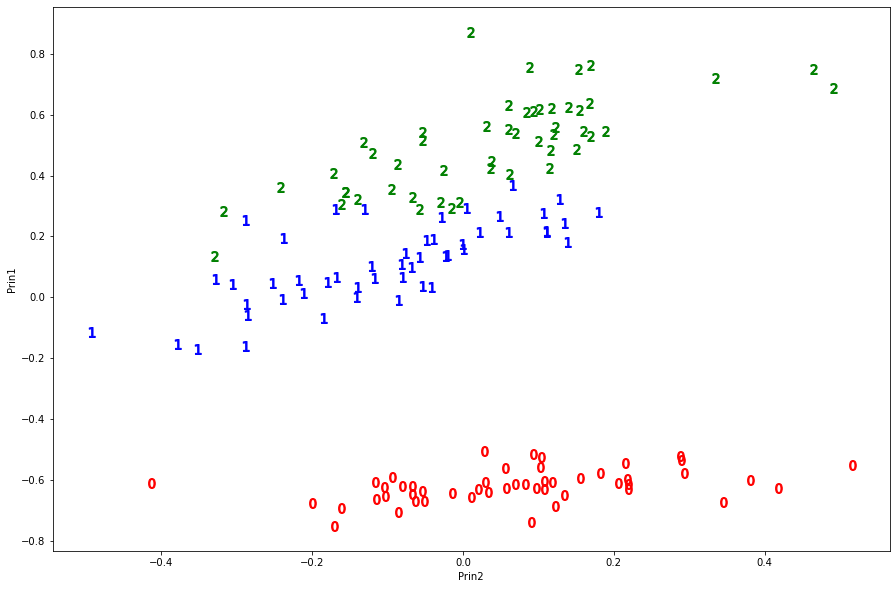

In [8]:
#Plot first two principal component scores with cluster label based on mean-shift method
plt.figure(figsize = (15,10))
plt.xlabel('Prin2') ; plt.ylabel('Prin1')
color = {0:'red', 1:'blue', 2:'green'}
for i in range(len(iris2)):
    plt.scatter(pc[i,1], pc[i,0], 
                marker = "$ {} $".format(kde.labels_[i]), 
                s = 100, 
                c = color[kde.labels_[i]])

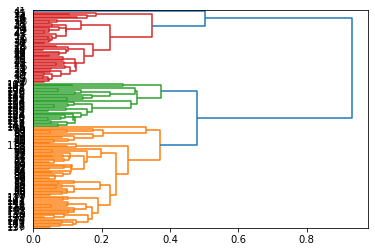

In [9]:
#(c) Compare the results of the three (hierarchical, K-means, Mean-shift) cluster analyses. Do they produce similar clusters?
#Repeat hierarchical cluster analysis
from scipy.cluster.hierarchy import linkage, dendrogram
x = iris2.drop('Species', axis=1)
y = iris2['Species']
linked = linkage(x, method = 'centroid')
labelList = list(range(150))
leaves = dendrogram(linked, 
           orientation = 'right',
           count_sort = 'descending',
           distance_sort = 'descending',
           labels = labelList,
           leaf_font_size = 10,
           get_leaves = True,
           color_threshold = 0.4)['leaves']
hier_clust1 = leaves[100:]
hier_clust2 = leaves[:70]
hier_clust3 = leaves[70:100]

#label clusters
y_hier = pd.Series(range(150), name = "cluster_hier")
y_hier = y_hier.replace(to_replace = hier_clust1, value = 0)
y_hier = y_hier.replace(to_replace = hier_clust2, value = 1)
y_hier = y_hier.replace(to_replace = hier_clust3, value = 2)

In [10]:
#Repeat K-means analysis
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(x)
group = pd.DataFrame(kmeans.labels_, columns=['cluster_kmean'])
Xkmean = x.join(group)
y_kmean = Xkmean['cluster_kmean']
Xkmean

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4),cluster_kmean
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [11]:
#Compare Hiearchical and K-means
from sklearn.metrics import confusion_matrix
C1 = pd.DataFrame(confusion_matrix(y_hier, y_kmean),
                  index = np.sort(y_hier.unique()), 
                  columns = np.sort(y_kmean.unique()))
C1['Total'] = C1.sum(axis = 1) #row sum
C1.loc['Total',:] = C1.sum(axis = 0) # column sum
C1.index.names = ['Hierarchical'] ; C1.columns.names = ['K-means']
C1.astype(int)

K-means,0,1,2,Total
Hierarchical,,,,
0,50,0,0,50
1,0,61,9,70
2,0,0,30,30
Total,50,61,39,150


In [12]:
#Accuracy
141/150

0.94

In [13]:
#Compare Hierarchical and Mean-shift
C2 = pd.DataFrame(confusion_matrix(y_hier, y_kde),
                  index = np.sort(y_hier.unique()), 
                  columns = np.sort(y_kde.unique()))
C2['Total'] = C2.sum(axis = 1) #row sum
C2.loc['Total',:] = C2.sum(axis = 0) # column sum
C2.index.names = ['Hierarchical'] ; C2.columns.names = ['Mean-shift']
C2.astype(int)

Mean-shift,0,1,2,Total
Hierarchical,,,,
0,50,0,0,50
1,0,50,20,70
2,0,0,30,30
Total,50,50,50,150


In [14]:
#Accuracy
130/150

0.8666666666666667

In [15]:
#Compare K-means and Mean-shift
C3 = pd.DataFrame(confusion_matrix(y_kmean, y_kde),
                  index = np.sort(y_kmean.unique()), 
                  columns = np.sort(y_kde.unique()))
C3['Total'] = C3.sum(axis = 1) #row sum
C3.loc['Total',:] = C3.sum(axis = 0) # column sum
C3.index.names = ['K-means'] ; C2.columns.names = ['Mean-shift']
C3.astype(int)

,0,1,2,Total
K-means,,,,
0,50,0,0,50
1,0,47,14,61
2,0,3,36,39
Total,50,50,50,150


In [16]:
#Accuracy
133/150

0.8866666666666667

In [17]:
#Compare cluster labels
pd.DataFrame({'cluster_hier': y_hier, 'cluster_kmean': y_kmean, 'cluster_kde': y_kde})

,cluster_hier,cluster_kmean,cluster_kde
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
145,2,2,2
146,1,1,2
147,1,2,2
148,2,2,2
